In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Group_4_data_cleaned.csv",index_col=0)
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
0,5.0,7,35,1.400,0.400,0.657,2.33,14,23.0,6.0,1
1,6.0,7,42,1.167,0.429,0.881,3.60,18,37.0,5.0,1
2,6.0,18,108,3.000,0.287,0.741,4.43,31,80.0,7.0,1
3,5.0,7,35,1.400,0.371,0.743,4.33,13,26.0,3.0,1
4,6.0,3,18,0.500,0.500,0.944,2.25,9,17.0,4.0,1


In [3]:
print(df.describe())
print(df.info())

            height       length         area        eccen      p_black  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      8.491778    75.944089   678.280833     9.422260     0.355031   
std       2.958167    77.844052   760.273682     9.661801     0.139284   
min       2.500000     1.000000     7.000000     0.007000     0.052000   
25%       7.000000    17.000000   114.000000     2.143000     0.261000   
50%       8.000000    41.000000   322.000000     5.167000     0.337000   
75%      10.000000   107.000000   980.000000    13.625000     0.426000   
max      14.500000   242.000000  2279.000000    30.848000     0.673500   

             p_and      mean_tr     blackpix     blackand     wb_trans  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      0.786324     2.578667   198.322310   492.037365    86.901242   
std       0.166482     1.310313   208.242346   532.593288    92.165275   
min       0.307000     1.000000     7

In [4]:
output_dict={1:'text',2:'horizontal line',3:'picture',4:'vertical line',5:'graphic'}
df["y"].value_counts().rename(index=output_dict)

text               4913
horizontal line     329
graphic             115
vertical line        88
picture              28
Name: y, dtype: int64

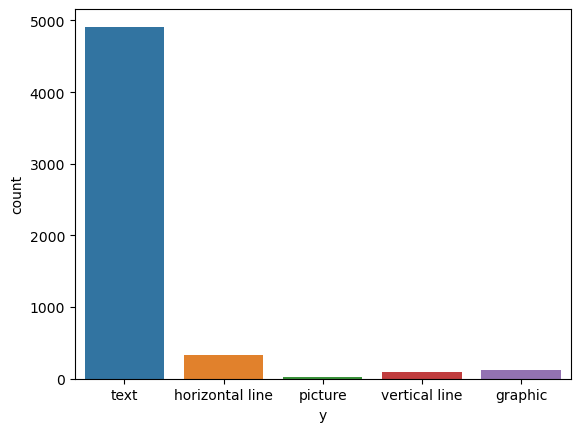

In [5]:
ax=sns.countplot(df['y'])
ax.set(xticklabels=output_dict.values())
plt.show()

In [6]:
X=df.iloc[:, :-1]
y=df['y']

oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
y_train.value_counts()

3    3945
4    3938
5    3924
1    3923
2    3922
Name: y, dtype: int64

In [9]:
#suppot vector classifier
svm = SVC()
params= {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             } 

In [10]:
random_search = RandomizedSearchCV(svm, params, cv = 5,n_jobs=-1, refit = True, verbose = 3)
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=3)

In [11]:
print(f"The best hyperparameters: {random_search.best_params_}")
print(f"The best score: {random_search.best_score_}")

The best hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 10}
The best score: 0.9806635712866282


In [12]:
print(random_search.best_estimator_)

SVC(C=10, gamma=1)


In [13]:
model1 = SVC(kernel="linear", C=10)
model1.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [14]:
y_pred=model1.predict(X_test_scaled)

In [15]:
accuracy_score(y_test,y_pred)

0.9562385507836353

In [16]:
cv_scores = cross_val_score(model1, 
                            X_train_scaled, 
                            y_train, 
                            cv=KFold(n_splits=10, shuffle=True),
                            scoring='accuracy')

cv_scores

array([0.95727365, 0.95879959, 0.95470738, 0.95267176, 0.95776081,
       0.95419847, 0.95216285, 0.95012723, 0.95165394, 0.96641221])

Average Accuracy 0.9555767901656402
Standard deviation of Accuracy 0.004508641448165564


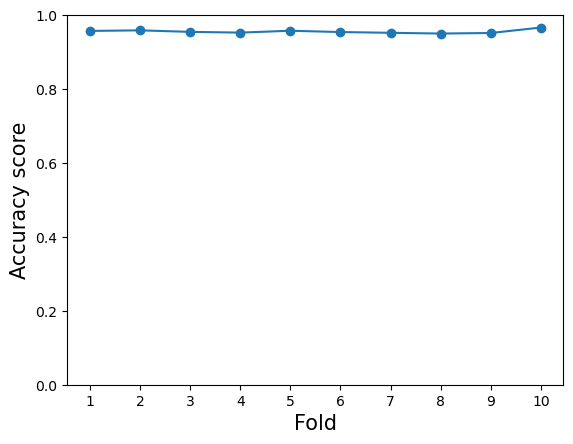

In [17]:
plt.plot(range(1, 11), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,11))
print("Average Accuracy",cv_scores.mean())
print("Standard deviation of Accuracy",cv_scores.std())

In [18]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[891,  24,   8,  21,  46],
       [ 20, 929,   0,  23,  19],
       [  0,   0, 968,   0,   0],
       [  9,  13,   0, 953,   0],
       [ 22,   0,   0,  10, 957]])

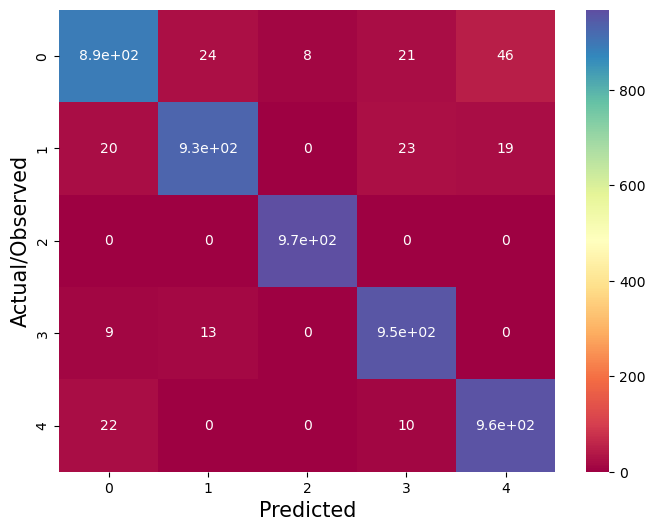

In [19]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.90      0.92       990
           2       0.96      0.94      0.95       991
           3       0.99      1.00      1.00       968
           4       0.95      0.98      0.96       975
           5       0.94      0.97      0.95       989

    accuracy                           0.96      4913
   macro avg       0.96      0.96      0.96      4913
weighted avg       0.96      0.96      0.96      4913



In [21]:
model2 = SVC(kernel="poly", degree=3)
model2.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [22]:
y_pred=model2.predict(X_test_scaled)

In [23]:
accuracy_score(y_test,y_pred)

0.9607164665174028

In [24]:
cv_scores = cross_val_score(model2, 
                            X_train_scaled, 
                            y_train, 
                            cv=KFold(n_splits=10, shuffle=True),
                            scoring='accuracy')

cv_scores

array([0.9664293 , 0.96286877, 0.95368957, 0.95877863, 0.9648855 ,
       0.9648855 , 0.9562341 , 0.96081425, 0.9648855 , 0.95979644])

Average Accuracy 0.9613267532790258
Standard deviation of Accuracy 0.003997086026462662


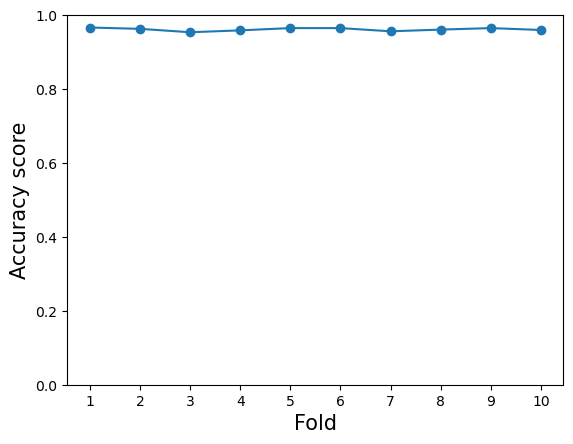

In [25]:
plt.plot(range(1, 11), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,11))
print("Average Accuracy",cv_scores.mean())
print("Standard deviation of Accuracy",cv_scores.std())

In [26]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[901,  15,   2,   9,  63],
       [ 12, 926,   0,  23,  30],
       [  0,   0, 968,   0,   0],
       [  0,  13,   0, 953,   9],
       [  7,   0,   0,  10, 972]])

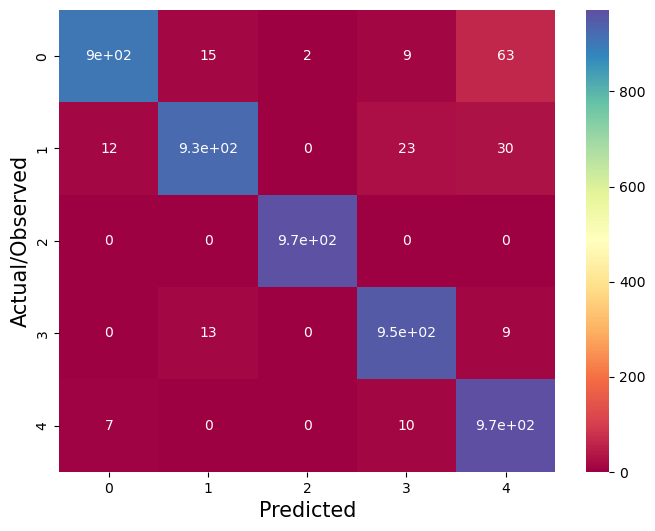

In [27]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.91      0.94       990
           2       0.97      0.93      0.95       991
           3       1.00      1.00      1.00       968
           4       0.96      0.98      0.97       975
           5       0.91      0.98      0.94       989

    accuracy                           0.96      4913
   macro avg       0.96      0.96      0.96      4913
weighted avg       0.96      0.96      0.96      4913



In [29]:
model4= MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (500,), (1000,)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}
clf = RandomizedSearchCV(model4, param_grid)
clf.fit(X_train_scaled,y_train)

[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.966 total time=   3.5s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.894 total time=   8.8s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.936 total time=   5.2s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.891 total time=   8.7s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.841 total time=  18.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.952 total time=   3.4s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.974 total time=   3.7s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.977 total time=   1.4s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.980 total time=   1.7s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.895 total time=   8.6s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.924 total time=   5.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   5.1s
[CV 3/5] END ......C=1, gamm

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(100,), (200,),
                                                               (500,),
                                                               (1000,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']})

In [30]:
clf.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (500,),
 'alpha': 0.01,
 'activation': 'relu'}

In [31]:
clf = MLPClassifier(solver = clf.best_params_['solver'],learning_rate = clf.best_params_['learning_rate'],
                    hidden_layer_sizes = clf.best_params_['hidden_layer_sizes'],
                    alpha = clf.best_params_['alpha'],
                    activation = clf.best_params_["activation"])
clf.fit(X_train_scaled,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(500,))

In [32]:
y_pred=clf.predict(X_test_scaled)

In [33]:
accuracy_score(y_test,y_pred)

0.982291878689192

In [34]:
cv_scores = cross_val_score(clf, 
                            X_train_scaled, 
                            y_train, 
                            cv=KFold(n_splits=10, shuffle=True),
                            scoring='accuracy')

cv_scores

array([0.97812818, 0.98321465, 0.9826972 , 0.98931298, 0.98066158,
       0.97913486, 0.98015267, 0.97862595, 0.98422392, 0.97760814])

Average Accuracy 0.9813760130876297
Standard deviation of Accuracy 0.0033995577765609593


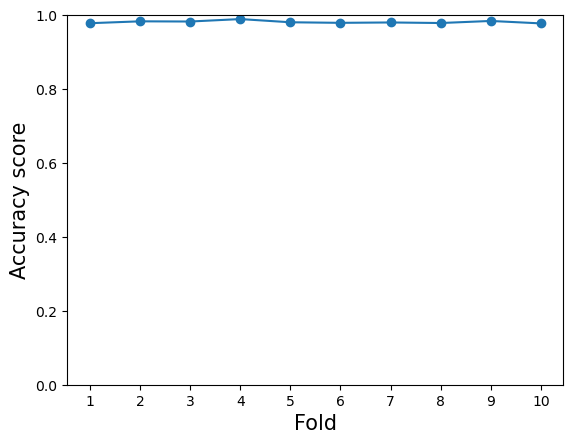

In [35]:
plt.plot(range(1, 11), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,11))
print("Average Accuracy",cv_scores.mean())
print("Standard deviation of Accuracy",cv_scores.std())

In [9]:
from skelm import ELMClassifier

model3= ELMClassifier(alpha=0.001, n_neurons=512, ufunc='relu')
model3.fit(X_train_scaled,y_train)

ELMClassifier(alpha=0.001, n_neurons=512, ufunc='relu')

In [10]:
y_pred=model3.predict(X_test_scaled)

In [11]:
accuracy_score(y_test,y_pred)

0.9759820883370649

In [12]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[928,  13,   3,  13,  33],
       [  4, 958,   0,  17,  12],
       [  0,   0, 968,   0,   0],
       [  0,  13,   0, 962,   0],
       [  0,   0,   0,  10, 979]], dtype=int64)

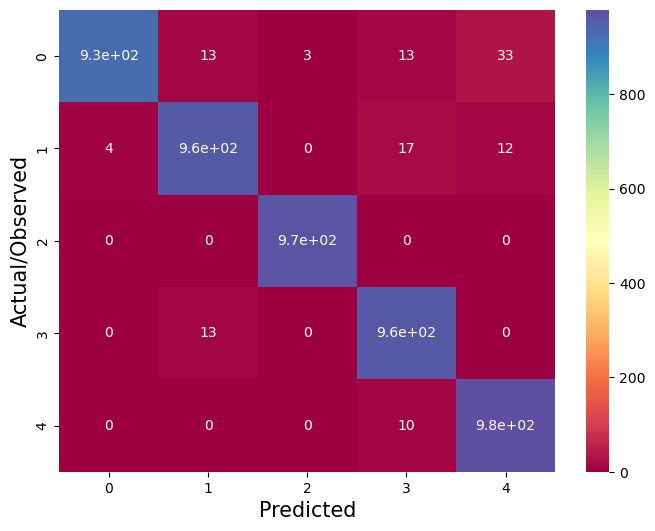

In [13]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97       990
           2       0.97      0.97      0.97       991
           3       1.00      1.00      1.00       968
           4       0.96      0.99      0.97       975
           5       0.96      0.99      0.97       989

    accuracy                           0.98      4913
   macro avg       0.98      0.98      0.98      4913
weighted avg       0.98      0.98      0.98      4913



In [42]:
cv_scores = cross_val_score(model3, 
                            X_train_scaled, 
                            y_train, 
                            cv=KFold(n_splits=10, shuffle=True),
                            scoring='accuracy',
                           )

cv_scores

ValueError: The key pairwise is not defined in _get_tags() for the class ELMClassifier.

In [ ]:
plt.plot(range(1, 11), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,11))
print("Average Accuracy",cv_scores.mean())
print("Standard deviation of Accuracy",cv_scores.std())

In [22]:
pip install torchvision


     ---------------------------------------- 1.2/1.2 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 172.3/172.3 MB 2.4 MB/s eta 0:00:00
